In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 
     |████████████████████████████████| 128 kB 9.0 MB/s 
     |████████████████████████████████| 110 kB 50.0 MB/s 
     |████████████████████████████████| 4.0 MB 43.7 MB/s 
     |████████████████████████████████| 112 kB 83.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")
sp500.index = pd.to_datetime(sp500.index) # made date as the index

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-16 00:00:00-05:00,3890.909912,3890.909912,3827.909912,3852.360107,7493660000,0.0,0.0
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,0.0,0.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,0.0,0.0


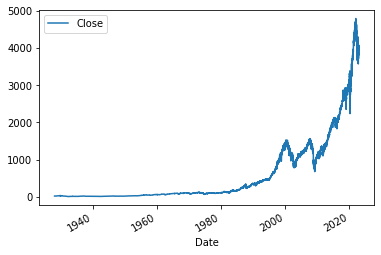

In [ ]:
sp500.plot.line(y="Close", use_index=True)

# Editing the dataset


In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
ds_arima = sp500[:]
ds_arima

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-16 00:00:00-05:00,3890.909912,3890.909912,3827.909912,3852.360107,7493660000,3817.659912,0
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1


# Arima


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.9 MB/s 
     |████████████████████████████████| 9.9 MB 50.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

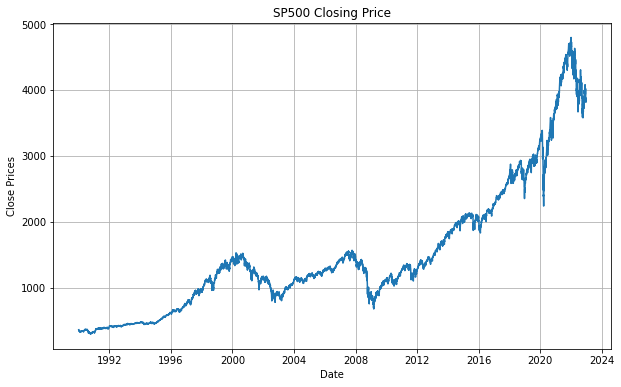

In [ ]:
#plot stock's daily close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(ds_arima['Close'])
plt.title('SP500 Closing Price')
plt.show()

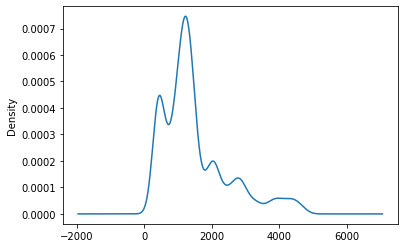

In [ ]:
#Probability Distribution of the dataset
df_close = ds_arima['Close']
df_close.plot(kind='kde')

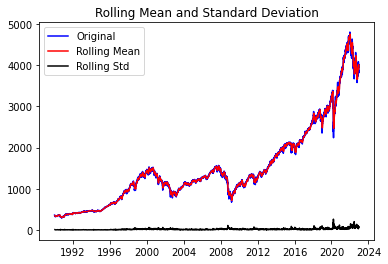

Results of dickey fuller test
Test Statistics                   0.580174
p-value                           0.987117
No. of lags used                 37.000000
Number of observations used    8272.000000
critical value (1%)              -3.431141
critical value (5%)              -2.861889
critical value (10%)             -2.566956
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

In the graph, the mean and standard deviation increases, indicating that our series isn’t stationary.


<Figure size 432x288 with 0 Axes>

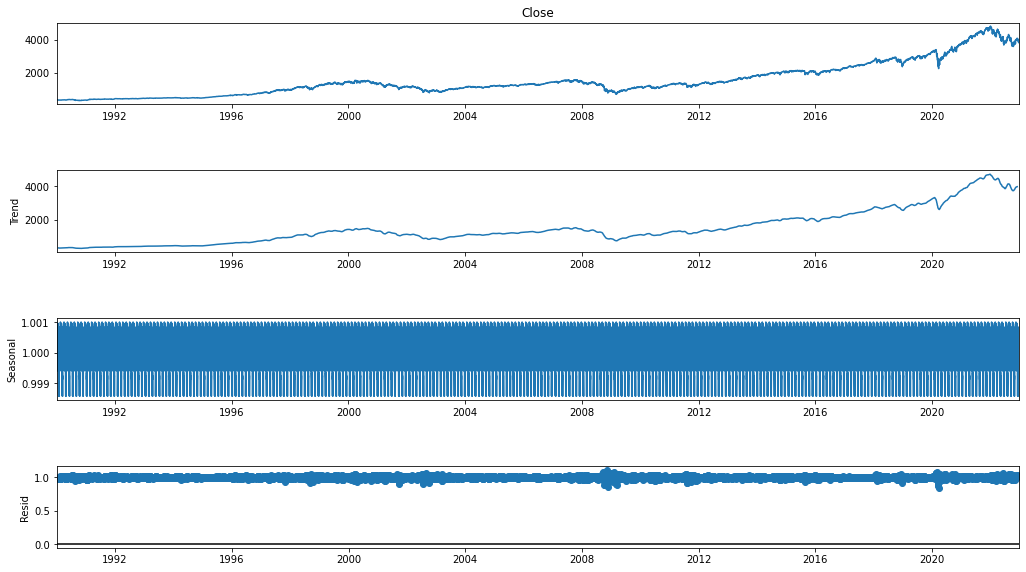

In [ ]:
#To separate the trend and the seasonality from a time series, we can decompose the series
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

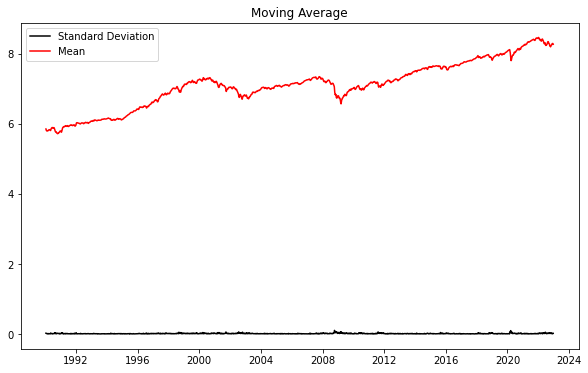

In [ ]:
#if not stationary then eliminate trend

#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

8310


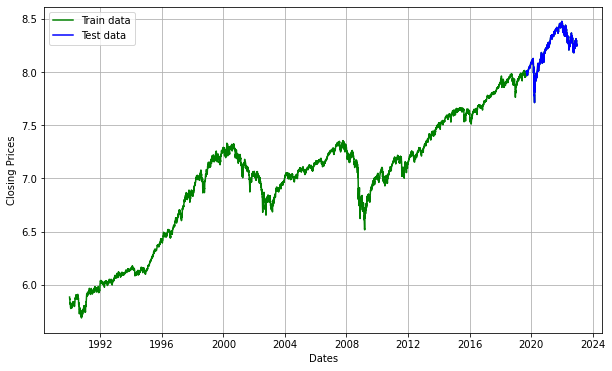

In [ ]:
#split data into train and training set
print(df_log.size)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
#print(test_data)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-46168.856, Time=1.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-46188.384, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-46190.347, Time=4.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-46165.842, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-46200.248, Time=6.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-46199.249, Time=2.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-46199.442, Time=3.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-46201.513, Time=5.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-46199.493, Time=8.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-46197.208, Time=9.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-46197.330, Time=1.37 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 43.791 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observat

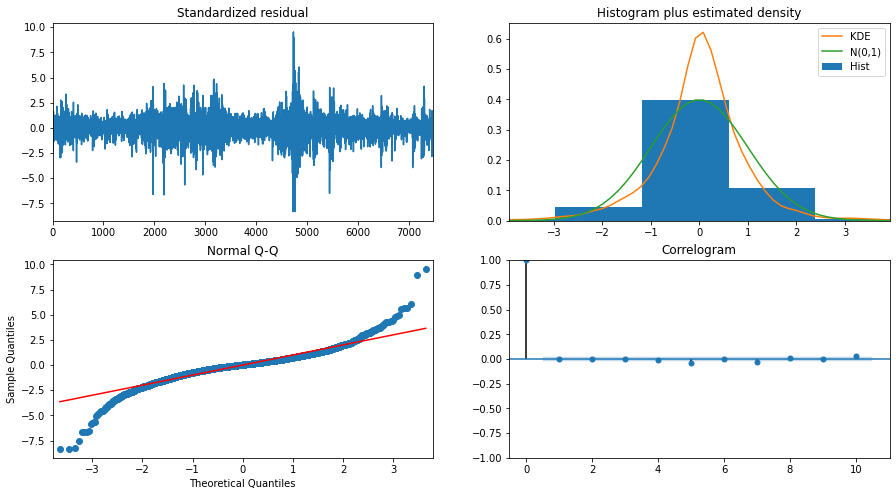

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
#Modeling

# Build Model
model = sm.tsa.arima.ARIMA(train_data, order=(0,1,2))  
fitted = model.fit()  
print(fitted.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7476
Model:                 ARIMA(0, 1, 2)   Log Likelihood               23101.665
Date:                Thu, 22 Dec 2022   AIC                         -46197.330
Time:                        16:05:05   BIC                         -46176.572
Sample:                             0   HQIC                        -46190.200
                               - 7476                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0558      0.007     -8.568      0.000      -0.069      -0.043
ma.L2         -0.0411      0.005     -7.580      0.000      -0.052      -0.031
sigma2         0.0001   8.99e-07    134.606      0.0

In [ ]:
# Forecast
fc = fitted.forecast(831, alpha=0.05)  # 95% conf
conf = fitted.conf_int()

#print(fc)
#print(conf)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ma.L1    -0.068608
ma.L2    -0.051777
sigma2    0.000119
Name: 0, dtype: float64
Date
2022-12-16 00:00:00-05:00   NaN
2022-12-19 00:00:00-05:00   NaN
2022-12-20 00:00:00-05:00   NaN
2022-12-21 00:00:00-05:00   NaN
2022-12-22 00:00:00-05:00   NaN
Name: 0, dtype: float64
Date
2022-12-16 00:00:00-05:00   NaN
2022-12-19 00:00:00-05:00   NaN
2022-12-20 00:00:00-05:00   NaN
2022-12-21 00:00:00-05:00   NaN
2022-12-22 00:00:00-05:00   NaN
Name: 1, dtype: float64


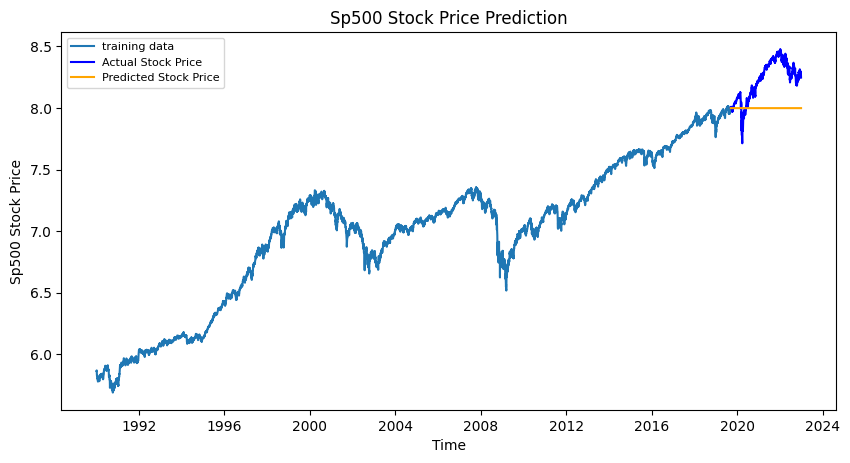

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc.values, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)
print(conf.iloc[:, 0])
#print(conf.iloc[:, 1])
#print(fc_series.tail())
print(lower_series.tail())
print(upper_series.tail())
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Sp500 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Sp500 Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc.values)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc.values)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc.values))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc.values - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.07716223387557475
MAE: 0.24020181591639986
RMSE: 0.27778090984726567
MAPE: 0.028902538976683788
